<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.401 · Fonaments de Programació</p>
    <p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Fonaments de Programació
============================

--- 

Unitat 4: Llibreries científiques en Python - SciPy
-----------------------------------------------------

---

### Instruccions d'ús

Aquest document és un *notebook* interactiu que intercala explicacions més aviat teòriques de conceptes de programació amb fragments de codi executables. Per aprofitar els avantatges que aporta aquest format, us recomanem que, en primer lloc, llegiu les explicacions i el codi que us proporcionem. D'aquesta manera tindreu un primer contacte amb els conceptes que hi exposem. Ara bé, **la lectura és només el principi!** Una vegada hàgiu llegit el contingut, no oblideu executar el codi proporcionat i modificar-lo per crear-ne variants que us permetin comprovar que heu entès la seva funcionalitat i explorar-ne els detalls d'implementació. Per últim, us recomanem també consultar la documentació enllaçada per explorar amb més profunditat les funcionalitats dels mòduls presentats. 



Per guardar possibles modificacions que feu sobre aquest notebook, us aconsellem que munteu la unitat de Drive a Google Colaboratory (colab). Heu d'executar les instruccions següents:

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/prog_datasci_4

### Introducció

A continuació es presentaran explicacions i exemples d'ús de la
llibreria scipy. Recordeu que podeu anar executant els exemples per
obtenir-ne els resultats.

A continuació s'inclou la taula de continguts, que podeu fer servir per navegar pel document:

<ul style="list-style-type:none">
    <li><a href='#1-Introduccio'>1 Introducció</a></li>
    <li><a href="#2-Recull-exemples">2 Recull d'exemples</a></li>
    <ul style="list-style-type:none">
        <li><a href="#2.1-Exemple-1">2.1 Exemple 1: simulació d'una apocalipsi zombi</a></li>
        <li><a href="#2.2-Exemple-2">2.2 Exemple 2: buscant cristalls de proteïnes</a></li>
    </ul>
    <li><a href="#3-Exercicis-i-preguntes-teoriques">3 Exercicis i preguntes teòriques</a></li>
    <ul style="list-style-type:none">
        <li><a href="#3.1-Instruccions-importants">3.1 Instruccions importants</a></li>
    </ul>
</ul>

<a id='1-Introduccio'></a>
# 1 Introducció

[SciPy](http://www.scipy.org/) és una llibreria molt important per a la comunitat científica en Python. Com dèiem abans, ha anat incloent poc a poc altres paquets importants com NumPy, SymPy, Matplotlib o el mateix IPython en el qual es coneix com SciPy stack, o la pila de desenvolupament d'eines científiques en Python. El clar avantatge d'integrar els diferents paquets en una llibreria és dissenyar una interfície en comú que permeti la comunicació entre diferents llibreries de desenvolupament. Per exemple, imaginem que volem representar dades de forma matricial (farem servir NumPy per fer-ho), que volem calcular distàncies (farem servir algorismes inclosos en SciPy) o, finalment, que volem representar aquests resultats (Matplotlib va ser dissenyat per a això). Amb tan sols tres línies al començament del nostre codi, tindrem tota la potència d'aquestes llibreries i les dades que gestionin seran compatibles entre elles.

Finalment, el paquet principal de SciPy és la SciPy library.

<a id='2-Recull-exemples'></a>
# 2 Recull d'exemples

<a id='2.1-Exemple-1'></a>
## 2.1. Exemple 1: simulació d'una apocalipsi zombi

[Munz i altres al
2009](http://mysite.science.uottawa.ca/rsmith43/Zombies.pdf) van definir
un model d'invasió zombi mitjançant un sistema d'equacions diferencials
ordinàries:

-   *dS/dt = P - B\*S\*Z - d\*S*
-   *dZ/dt = B\*S\*Z + G\*R - A\*S\*Z*
-   *dR/dt = d\*S + A\*S\*Z - G\*R*

En què:

    S: el nombre de víctimes
    Z: el nombre de zombis
    R: el nombre de gent assassinada pels zombis
    P: la ràtio de naixements
    d: la probabilitat de mort natural
    B: la probabilitat de propagació de la malaltia zombi (persones vives i sanes)
    G: la probabilitat que una persona morta torni a la vida com a zombi
    A: la probabilitat que un zombi sigui aniquilat completament

SciPy pot resoldre sistemes de primer ordre d'equacions diferencials de
manera senzilla. Ens centrarem a resoldre l'expressió: *dy/dt = f(y,
t)* on *y = \[S, Z, R\]*.

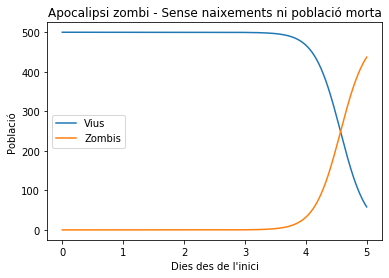

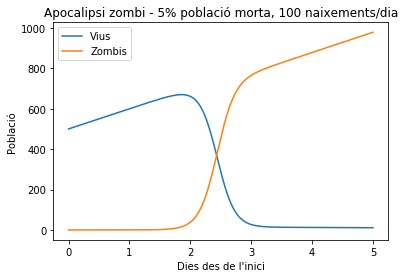

In [3]:
%matplotlib inline

# Font del codi: http://wiki.scipy.org/Cookbook/Zombie_Apocalypse_ODEINT

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

P = 0       # Ràtio de naixements
d = 0.0001  # Percentatge de mort natural (per dia)
B = 0.0095  # Percentatge de transmissió  (per dia)
G = 0.0001  # Percentatge de resurreccions (per dia)
A = 0.0001  # Percentatge de destrucció  (per dia)

# Resol el sistema dy/dt = f(y, t):
def f(y, t):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    # El model de Munz et al. 2009
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    return [f0, f1, f2]

# Condicions inicials
S0 = 500.               # població inicial
Z0 = 0                  # població inicial zombie
R0 = 0                  # població inicial muerta
y0 = [S0, Z0, R0]       # condicions inicials expressades com un vector
t  = np.linspace(0, 5., 1000)   # vector de temps (passos de simulació)

# Resolem el sistema:
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Representem els resultats:
plt.figure()
plt.plot(t, S, label='Vius')
plt.plot(t, Z, label='Zombis')
plt.xlabel("Dies des de l'inici")
plt.ylabel(u'Població')
plt.title(u'Apocalipsi zombi - Sense naixements ni població morta')
plt.legend(loc=0)

# Canviem les condicions inicials:
R0 = 0.05*S0   # 5% de la població inicial està morta
P  = 100       # 100 nous naixements per dia
y0 = [S0, Z0, R0]

# Tornem a resoldre el sistema:
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Vius')
plt.plot(t, Z, label='Zombis')
plt.xlabel("Dies des de l'inici")
plt.ylabel(u'Població')
plt.title(u'Apocalipsi zombi - 5% població morta, 100 naixements/dia')
plt.legend(loc=0)
pass

<a id='2.2-Exemple-2'></a>
## 2.2. Exemple 2: buscant cristalls de proteïnes

La criomicroscòpia electrònica és una tècnica de microscòpia molt
utilitzada en biologia estructural en què la mostra que s'ha d'estudiar es troba
a temperatures criogèniques. La imatge següent és d'una solució de la
proteïna GroEL (font: Wikipedia - "Cryoem groel", Vossman):

<img src="files/media/Cryoem_groel.png">

A continuació escriurem un codi que ens permeti comptar el nombre de vidres de
GroEL a la imatge:

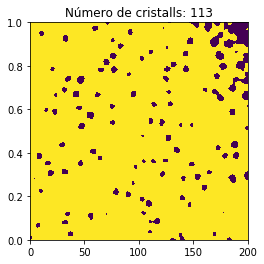

In [2]:
%matplotlib inline

import numpy as np
from scipy import ndimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Llegim la imatge original.
im = mpimg.imread('media/Cryoem_groel.png')
# Fem una còpia que utilitzarem per manipular.
image = im.copy()

# Apliquem un filtre gaussià amb mida de kernel 3.
im_g = ndimage.gaussian_filter(image, 3)
# Normalitzem
im_norm = (im_g - im_g.min()) / (float(im_g.max()) - im_g.min())
im_norm[im_norm < 0.5] = 0
im_norm[im_norm >= 0.5] = 1

# Convertim la imatge resultat per utilitzar la funció d'etiquetatge de Scipy.
result = 255 - (im_norm * 255).astype(np.uint8)

# Identifiquem el nombre de cristalls i els mostrem.
plt.title(u"Número de cristalls: %d" % ndimage.label(result)[1])
img = plt.imshow(np.asarray(im_norm), interpolation='nearest', extent=[0,200,0,1], aspect=200)
plt.show()

Aquest codi no és perfecte ja que no estem tenint en compte l'artefacte
de la cantonada superior dreta, però ens dona una idea de com aplicar
diferents filtres utilitzats en visió per ordinador a _scripts_ de molt
poques línies gràcies a SciPy.

<a id='3-Exercicis-i-preguntes-teoriques'></a>
# 3 Exercicis i preguntes teòriques

La part avaluable d'aquesta unitat consisteix en el lliurament d'un fitxer IPython Notebook amb extensió IPYNB que contindrà els diferents exercicis i les preguntes teòriques que s'han de contestar. Trobareu el fitxer (`prog_datasci_4_scilib_entrega.ipynb`) amb les activitats a la mateixa carpeta que aquest notebook que esteu llegint. **Hi ha un sol fitxer d'activitats per a tota la unitat, que cobreix totes les llibreries que s'hi treballen.**


<a id='3.1-Instruccions-importants'></a>
## 3.1 Instruccions importants

És molt important que a l'hora de lliurar el fitxer Notebook amb les vostres activitats us assegureu que:

1. Les vostres solucions siguin originals. Esperem no detectar-hi còpia directa entre estudiants.
2. Tot el codi estigui correctament documentat. El codi sense documentar equivaldrà a un 0.
3. El fitxer comprimit que lliureu és correcte (conté les activitats de la PAC que heu de lliurar).

Per fer el lliurament, heu d'anar a la carpeta del drive `Colab Notebooks`, clicant botó dret a la PAC en qüestió i fent `Download`. D'aquesta manera, us baixereu la carpeta de la PAC comprimida en `zip`. Aquest és l'arxiu que heu de pujar al campus virtual de l'assignatura. 

# Autors

- Autor original **Brian Jiménez Garcia**, 2016.
- Actualitzat per **Cristina Pérez Solà**, 2017 i 2019.

<div style="width: 30%; clear: both;">
    <div style="width:0%;">&nbsp;</div>
           <img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-sa.png">
    </div>
</div>